# Linear Regression

In [1]:
%config Completer.use_jedi=False

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
#function of one variable first
eps = np.random.normal(loc=0.0,scale=5,size=50)
x = np.arange(start=-5,stop=5,step=0.2)
y = 2 + 3*x + eps
y1 = 2 + 3*x

In [3]:
df = pd.DataFrame(zip(x,y),columns=['x','y'])

In [4]:
df.head(5)

,x,y
0,-5.0,-3.683368
1,-4.8,-14.141329
2,-4.6,-3.498833
3,-4.4,-9.841702
4,-4.2,-11.679784


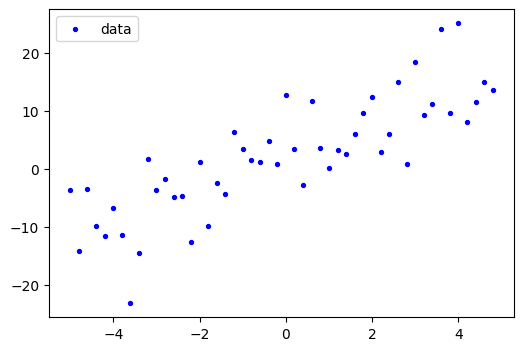

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(x,y,label='data',s=8,c='blue')
# plt.plot(x,y1,c='red',label='True y')
plt.xlabel='x'
plt.ylabel='y'
plt.legend()
plt.show()

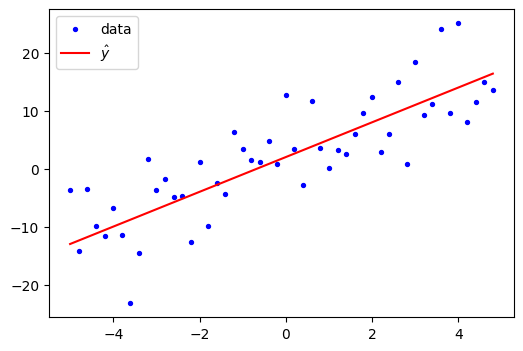

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(x,y,label='data',s=8,c='blue')
plt.plot(x,y1,c='red',label='$ \hat{y}$')
plt.xlabel='x'
plt.ylabel='y'
plt.legend()
plt.show()

# Let's fit the data using Linear regression <br>
# $\hat{y} = \hat{\theta}_0 + \hat{\theta}_1 x$ <br>

# $\hat{\theta}_1 = \frac{\sum_{i}^{n} (x_i-\overline{x})(y_i - \overline{y})}{\sum_{i}^n(x_i - \overline{x})^2 }$ or  $\hat{\theta}_1 = \frac{\overline{xy} - (\overline{x})(\overline{y})} {\overline{x^2} - (\overline{x})^2}$ <br>
# $\hat{\theta}_0 = \overline{y} - \hat{\beta}_1 \overline{x}$ or $\hat{\theta}_0 = \frac{(\overline{x^2})(\overline{y}) - (\overline{x})(\overline{xy})}{\overline{x^2} - (\overline{x})^2}$<br>


In [7]:
xav = np.average(x)
yav = np.average(y)

beta1 = np.sum((x - xav)*(y-yav))/np.sum((x-xav)*(x-xav))
beta0 = np.sum(yav-beta1*xav)

In [8]:
beta0, beta1 #expected 2 and 3

(2.4909887886687434, 2.828999236146001)

In [9]:
y_hat = beta0 + beta1*x

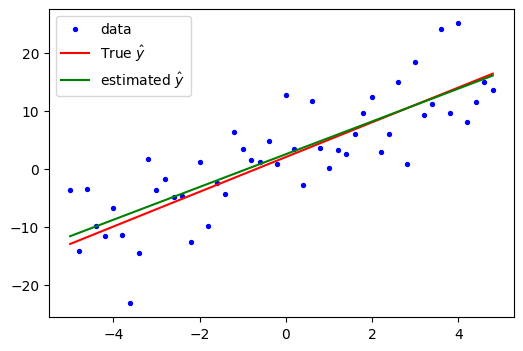

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(x,y,label='data',s=8,c='blue')
plt.plot(x,y1,c='red',label='True $\hat{y}$')
plt.plot(x,y_hat,c='green',label='estimated $\hat{y}$')
plt.xlabel='x'
plt.ylabel='y'
plt.legend()
plt.show()

Linear Regression Goodness of Fit
====

There are a few ways of measuring goodness of fit. One way is to just compute the SSR, the sum of the squared residuals. However, this has the negative that the units of $y$ appear in the goodness of fit. Here is what people typically use, the coefficient of determination:

$$R^2 = 1 - \frac{\textrm{SSR}}{\textrm{TSS}} = 1 - \frac{\sum_i \left(y - \hat{y}_i\right)^2}{\sum_i \left(y - \bar{y}\right)^2}$$

This equation has the property that it's unitless, it's $1$ when the fit is perfect, and $0$ when the fit is awful. In the case of linear regression, $R$ is the same as the correlation coefficient.

#### Calculate $R^2$

In [11]:
def r_sq(x,y,y_fit):
    yav = np.mean(y)
    rss = (y-y_fit).dot(y-y_fit)
    tss = (y-yav).dot(y-yav)
    return (1 - rss / tss)

In [12]:
rsq = r_sq(x,y,y1)
print(f'$R^2$ for true y is {rsq}')

rss = (y-y_hat).dot(y-y_hat)
tss = (y-yav).dot(y-yav)
rsq = 1 - rss / tss

print(f'$R^2$ for fit is {rsq}')
print(f'The value of R = {np.sqrt(rsq)}, corr coeff = {np.corrcoef(x,y)}')

$R^2$ for true y is 0.670973608195521
$R^2$ for fit is 0.6760616323061246
The value of R = 0.8222296712635251, corr coeff = [[1.         0.82222967]
 [0.82222967 1.        ]]
